## Preparation

In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
spark = SparkSession.builder\
    .appName('NYC Taxi traffic analysis')\
    .getOrCreate()

In [2]:
df = spark.read.format("parquet").load("gs://pyspark-tutorial-new/data/NYC/*.parquet")

In [3]:
df.limit(10).toPandas()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-10-01 00:25:56,2021-10-01 01:11:35,1.0,7.40,1.0,Y,140,36,1,33.0,3.00,0.5,4.00,0.0,0.3,40.80,2.5,0.00
1,1,2021-10-01 00:17:13,2021-10-01 00:41:31,1.0,14.10,1.0,N,209,94,2,39.0,3.00,0.5,0.00,0.0,0.3,42.80,2.5,0.00
2,2,2021-10-01 00:25:22,2021-10-01 00:48:07,2.0,5.64,1.0,N,238,107,1,20.0,0.50,0.5,4.76,0.0,0.3,28.56,2.5,0.00
3,1,2021-10-01 00:17:28,2021-10-01 00:56:30,0.0,5.50,1.0,N,48,179,1,27.5,3.00,0.5,3.00,0.0,0.3,34.30,2.5,0.00
4,1,2021-10-01 00:09:30,2021-10-01 00:32:06,1.0,3.70,1.0,N,79,25,2,17.5,3.00,0.5,0.00,0.0,0.3,21.30,2.5,0.00
5,2,2021-10-01 00:10:58,2021-10-01 00:25:27,1.0,4.20,1.0,N,143,42,1,14.5,0.50,0.5,3.66,0.0,0.3,21.96,2.5,0.00
6,2,2021-10-01 00:23:30,2021-10-01 00:39:39,1.0,6.97,1.0,N,138,80,2,21.5,0.50,0.5,0.00,0.0,0.3,24.05,0.0,1.25
7,1,2021-10-01 00:18:49,2021-10-01 00:32:53,1.0,4.00,1.0,N,148,140,1,14.0,3.00,0.5,3.55,0.0,0.3,21.35,2.5,0.00
8,1,2021-10-01 00:57:39,2021-10-01 01:03:31,1.0,1.90,1.0,N,148,256,1,8.0,3.00,0.5,2.36,0.0,0.3,14.16,2.5,0.00
9,1,2021-10-01 00:17:57,2021-10-01 01:37:43,1.0,66.60,1.0,N,138,265,2,170.5,1.75,0.5,0.00,23.3,0.3,196.35,0.0,1.25


## Assignements questions : 

### Trip Analysis: 

- Average duration and distance of rides: Compare these metrics by time of day, day of week, and month of year. This can reveal patterns such as longer trips during rush hours, on weekends, or during holiday seasons. 

   

In [4]:
df_trip = df.withColumn("trip_duration_mins", (unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime"))/60)

In [5]:
df_trip_hour = df_trip.groupBy(hour("tpep_pickup_datetime").alias("hour")).agg(avg("trip_duration_mins").alias("avg_duration"),avg("trip_distance").alias("avg_distance")).orderBy("hour")

In [6]:
df_trip_hour = df_trip_hour.toPandas()
df_trip_hour

,hour,avg_duration,avg_distance
0,0,15.730268,5.697302
1,1,15.850163,5.339389
2,2,14.827951,5.281638
3,3,15.549171,8.981666
4,4,16.769697,45.895843
5,5,16.754209,43.514597
6,6,16.470007,28.825264
7,7,16.430668,14.787098
8,8,15.924119,12.428778
9,9,15.937160,8.486986


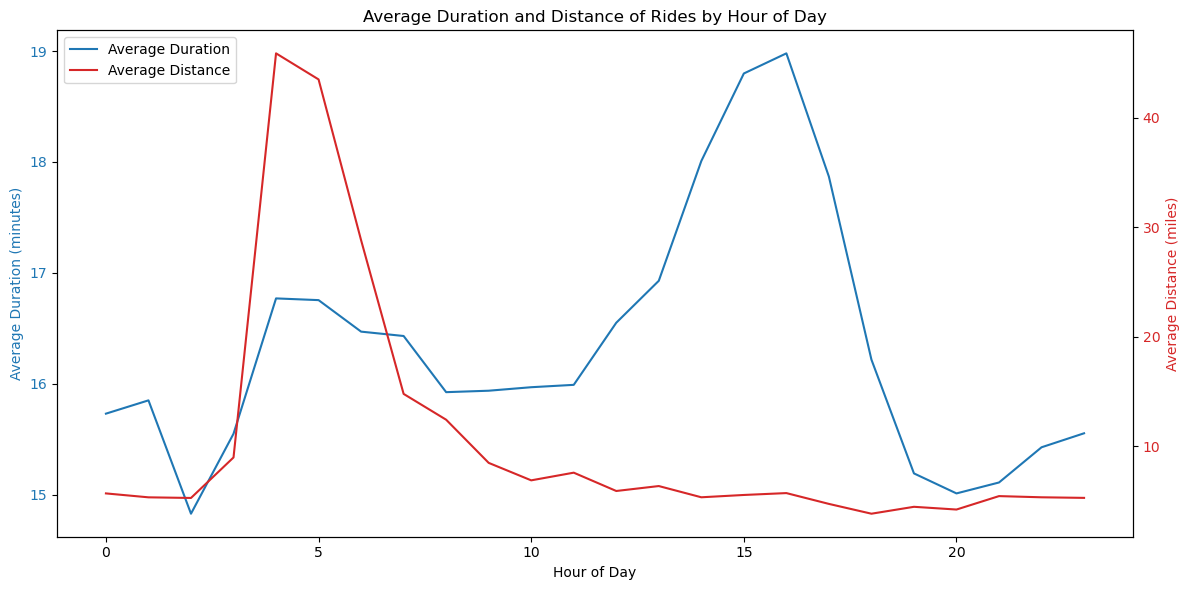

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Duration (minutes)', color=color)
ax1.plot(df_trip_hour["hour"], df_trip_hour["avg_duration"], color=color, label="Average Duration")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Distance (miles)', color=color)
ax2.plot(df_trip_hour["hour"], df_trip_hour["avg_distance"], color=color, label="Average Distance")
ax2.tick_params(axis='y', labelcolor=color)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title("Average Duration and Distance of Rides by Hour of Day")
fig.tight_layout()
plt.show()

In [8]:
df_trip_day = df_trip.groupBy(dayofweek("tpep_pickup_datetime").alias("weekday")).agg(avg("trip_duration_mins").alias("avg_duration"),avg("trip_distance").alias("avg_distance")).orderBy("weekday")

In [9]:
df_trip_day = df_trip_day.toPandas()
df_trip_day

,weekday,avg_duration,avg_distance
0,1,16.245225,6.887432
1,2,16.023323,7.124819
2,3,16.297383,7.222617
3,4,16.604711,6.525891
4,5,17.349291,6.803646
5,6,17.261996,7.143910
6,7,16.061015,6.773432


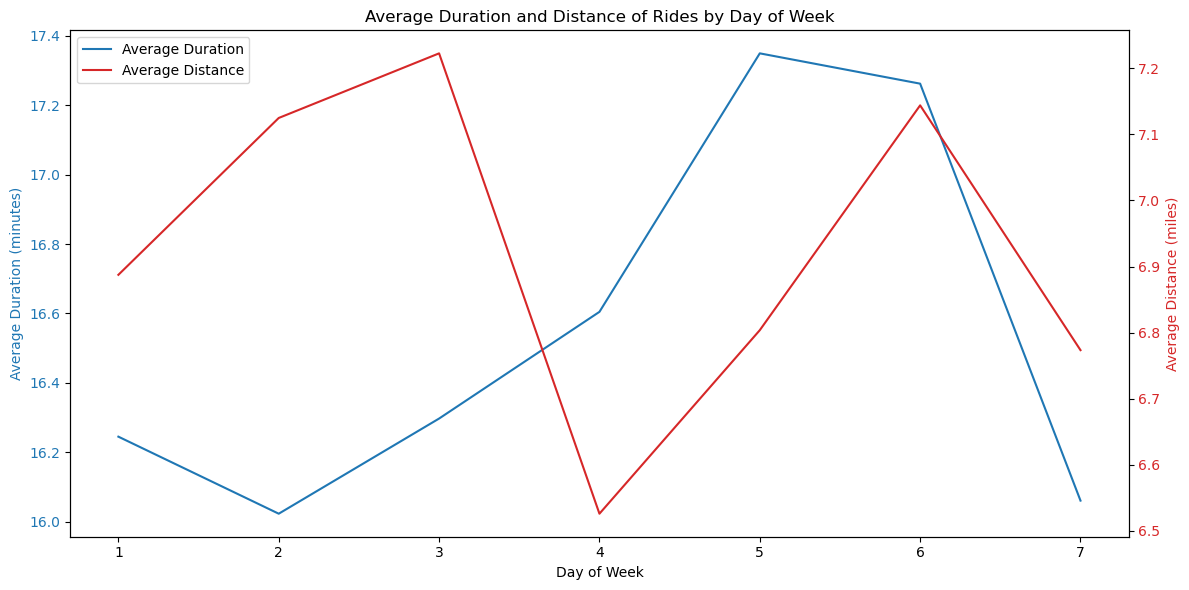

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Duration (minutes)', color=color)
ax1.plot(df_trip_day["weekday"], df_trip_day["avg_duration"], color=color, label="Average Duration")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Distance (miles)', color=color)
ax2.plot(df_trip_day["weekday"], df_trip_day["avg_distance"], color=color, label="Average Distance")
ax2.tick_params(axis='y', labelcolor=color)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title("Average Duration and Distance of Rides by Day of Week")
fig.tight_layout()
plt.show()

In [11]:
df_trip_month = df_trip.groupBy(month("tpep_pickup_datetime").alias("month")).agg(avg("trip_duration_mins").alias("avg_duration"),avg("trip_distance").alias("avg_distance")).orderBy("month")

In [12]:
df_trip_month = df_trip_month.toPandas()
df_trip_month

,month,avg_duration,avg_distance
0,1,13.961937,4.631774
1,2,14.886453,4.282058
2,3,14.730990,4.384335
3,4,15.510014,7.385713
4,5,15.906733,8.422930
5,6,16.826478,6.933835
6,7,16.624542,7.785665
7,8,16.572784,7.669676
8,9,17.500142,6.583627
9,10,17.420199,7.112614


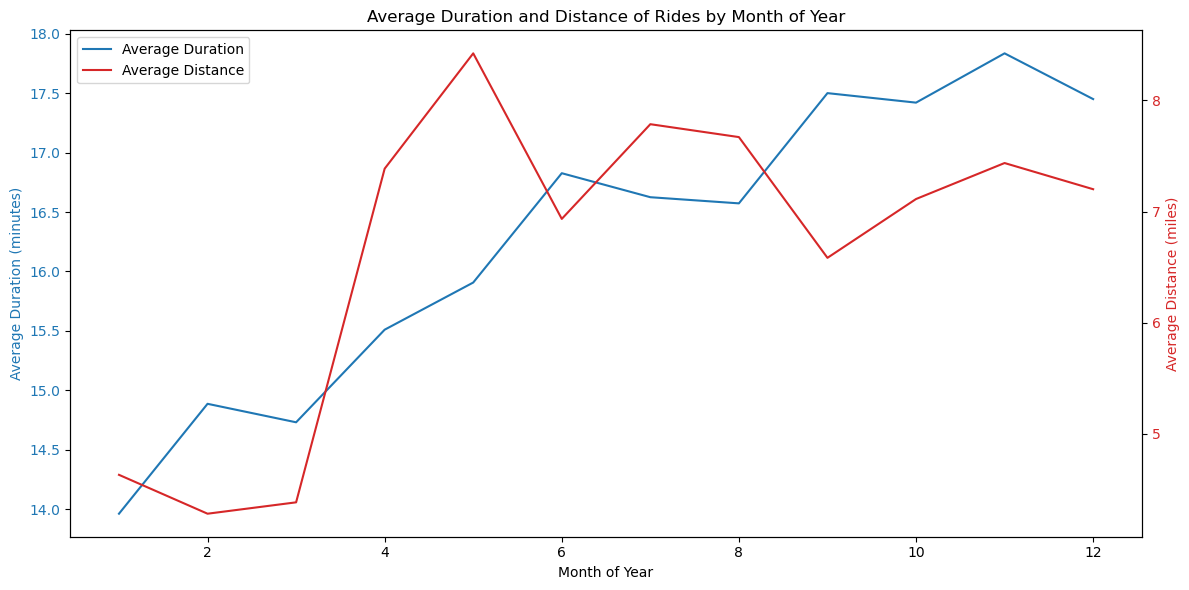

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Month of Year')
ax1.set_ylabel('Average Duration (minutes)', color=color)
ax1.plot(df_trip_month["month"], df_trip_month["avg_duration"], color=color, label="Average Duration")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Distance (miles)', color=color)
ax2.plot(df_trip_month["month"], df_trip_month["avg_distance"], color=color, label="Average Distance")
ax2.tick_params(axis='y', labelcolor=color)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title("Average Duration and Distance of Rides by Month of Year")
fig.tight_layout()
plt.show()

- Popular locations: Identify the top 10 pickup and dropoff locations. This could be interesting when mapped visually.

In [14]:
df_trip_pulocation = df_trip.groupby("PULocationID").count().orderBy(desc("count"))
df_trip_dolocation = df_trip.groupby("DOLocationID").count().orderBy(desc("count"))

In [15]:
df_trip_pulocation = df_trip_pulocation.limit(10).toPandas()
df_trip_pulocation

,PULocationID,count
0,237,1553554
1,236,1424614
2,161,1091329
3,132,1025063
4,186,1019650
5,142,989927
6,170,967766
7,162,954917
8,239,932473
9,141,909845


In [16]:
df_trip_dolocation = df_trip_dolocation.limit(10).toPandas()
df_trip_dolocation

,DOLocationID,count
0,236,1434919
1,237,1356518
2,161,1001077
3,170,920433
4,141,902052
5,239,886837
6,142,854324
7,48,782803
8,238,779046
9,162,772823


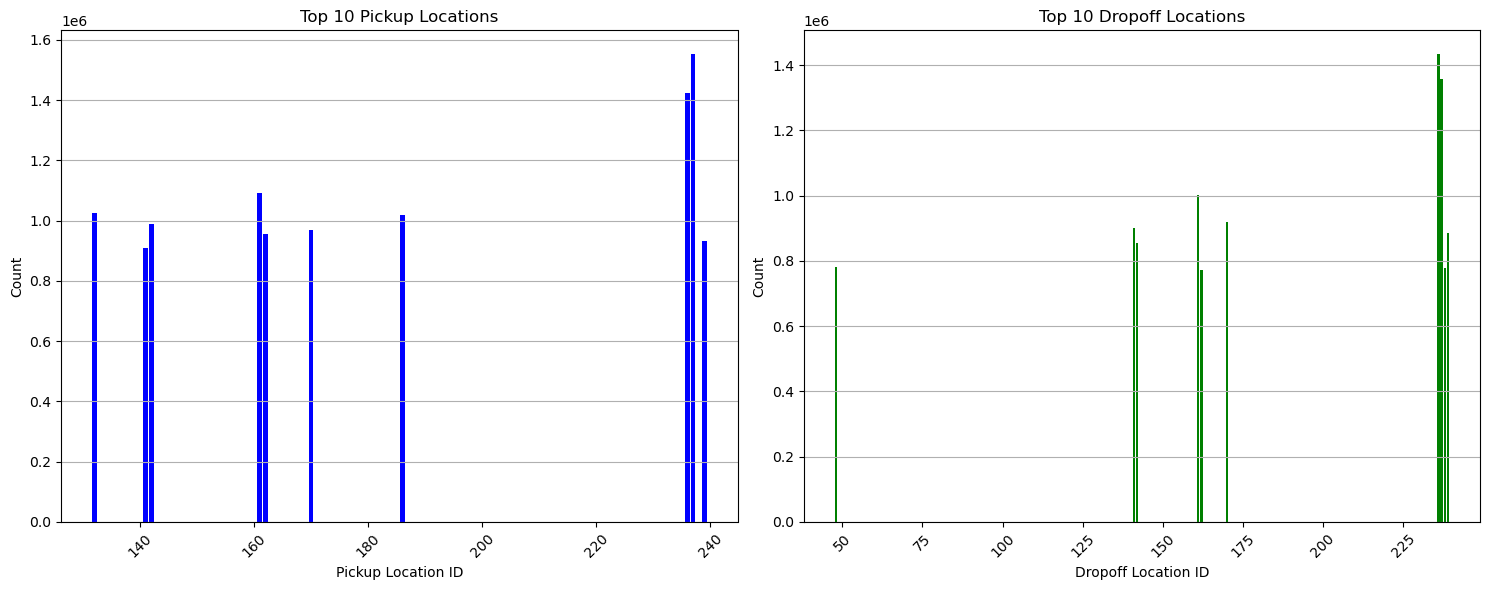

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(df_trip_pulocation["PULocationID"], df_trip_pulocation["count"], color='blue')
axes[0].set_xlabel('Pickup Location ID')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Pickup Locations')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')
axes[1].bar(df_trip_dolocation["DOLocationID"], df_trip_dolocation["count"], color='green')
axes[1].set_xlabel('Dropoff Location ID')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Dropoff Locations')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')
plt.tight_layout()
plt.show()

### Tip Analysis:

   - Tip percentage by trip: Do some locations tip more than others? Is there a correlation between distance and tip? 


In [18]:
df_tip = df.withColumn("tip_percentage", col("tip_amount") / col("total_amount") * 100)

In [19]:
df_tip_trip = df_tip.groupBy("PULocationID", "DOLocationID").agg(
    avg("tip_percentage").alias("avg_tip_percentage"),
    avg("trip_distance").alias("avg_distance")
).orderBy(desc("avg_tip_percentage"))

In [20]:
df_tip_trip.limit(10).toPandas()

,PULocationID,DOLocationID,avg_tip_percentage,avg_distance
0,187,251,56.179775,1.540000
1,176,176,53.906250,0.320000
2,96,236,48.851979,11.310000
3,109,172,46.948357,2.090000
4,251,161,46.200737,19.580000
5,120,151,43.010753,0.730000
6,118,214,41.356493,4.160000
7,172,214,39.966709,3.293333
8,208,114,38.551921,8.975000
9,34,1,38.417649,15.110000


In [21]:
correlation = df_tip.stat.corr("trip_distance", "tip_percentage")
correlation

-0.004491681362684126

- Tips by time: Does the time of day, week, or even year affect tipping behavior? You could cross-reference this with holidays or events.
   


In [22]:
df_tip_hour = df_tip.groupBy(hour("tpep_pickup_datetime").alias("hour")).agg(avg("tip_percentage").alias("avg_tip_percentage"),avg("trip_distance").alias("avg_distance")).orderBy("hour")

In [23]:
df_tip_hour = df_tip_hour.toPandas()
df_tip_hour

,hour,avg_tip_percentage,avg_distance
0,0,11.684731,5.697302
1,1,11.671819,5.339389
2,2,11.485560,5.281638
3,3,11.050372,8.981666
4,4,9.870020,45.895843
5,5,9.331040,43.514597
6,6,10.508343,28.825264
7,7,11.437861,14.787098
8,8,11.784927,12.428778
9,9,11.484900,8.486986


In [24]:
df_tip_week = df_tip.groupBy(dayofweek("tpep_pickup_datetime").alias("weekday")).agg(avg("tip_percentage").alias("avg_tip_percentage"),avg("trip_distance").alias("avg_distance")).orderBy("weekday")

In [25]:
df_tip_week = df_tip_week.toPandas()
df_tip_week

,weekday,avg_tip_percentage,avg_distance
0,1,11.594909,6.887432
1,2,11.328636,7.124819
2,3,11.503945,7.222617
3,4,11.596453,6.525891
4,5,11.599164,6.803646
5,6,11.495985,7.143910
6,7,11.649932,6.773432


In [26]:
df_tip_year = df_tip.groupBy(year("tpep_pickup_datetime").alias("year")).agg(avg("tip_percentage").alias("avg_tip_percentage"),avg("trip_distance").alias("avg_distance")).orderBy("year")

In [27]:
df_tip_year = df_tip_year.toPandas()
df_tip_year.fillna(0, inplace=True)
df_tip_year

,year,avg_tip_percentage,avg_distance
0,2002,0.000000,0.000000
1,2003,2.238890,1.653000
2,2004,12.195122,1.590000
3,2008,4.024889,3.267093
4,2009,3.536332,3.483448
5,2011,4.166667,1.810000
6,2020,8.982556,4.814375
7,2021,11.540304,6.922731
8,2022,12.487430,3.325918
9,2028,0.000000,16.150000


   - Does the payment type affect the tipping

In [28]:
df_tip_payment = df_tip.groupBy("payment_type").agg(avg("tip_percentage").alias("avg_tip_percentage"),avg("tip_amount")).orderBy("payment_type")

In [29]:
df_tip_payment = df_tip_payment.toPandas()
df_tip_payment

,payment_type,avg_tip_percentage,avg(tip_amount)
0,0,8.071014,2.170007
1,1,15.334128,3.075551
2,2,-0.001516,0.000411
3,3,0.147136,-0.011671
4,4,-0.350788,0.022958
5,5,0.000000,0.000000


### Fare Analysis:

  - Can you calculate the average fare by pull & drop location ?



In [30]:
df_fare_location = df.groupBy("PULocationID", "DOLocationID").agg(
    avg("fare_amount").alias("avg_fare")
).orderBy(desc("avg_fare"))

In [31]:
df_fare_location = df_fare_location.toPandas()
df_fare_location

,PULocationID,DOLocationID,avg_fare
0,154,28,1164.000000
1,234,189,843.466542
2,1,247,420.000000
3,83,136,378.500000
4,5,74,306.000000
...,...,...,...
49751,120,128,-19.500000
49752,133,262,-42.500000
49753,218,34,-52.000000
49754,80,9,-53.210000


  - Can you calculate the average fare by Passenger count ? to see if there is any correlation with passenger count and fare amount

In [32]:
df_fare_passenger = df.groupBy("passenger_count").agg(
    avg("fare_amount").alias("avg_fare")
).orderBy(desc("avg_fare"))

In [33]:
df_fare_passenger = df_fare_passenger.toPandas()
df_fare_passenger

,passenger_count,avg_fare
0,9.0,61.350000
1,7.0,52.916795
2,8.0,49.144082
3,NaN,25.502717
4,4.0,14.284688
5,2.0,13.776399
6,3.0,13.555664
7,6.0,12.751094
8,1.0,12.709558
9,5.0,12.666401


  - Can you correlate the fare amount and the distance trip ? 

In [34]:
correlation_fare_distance = df.stat.corr("fare_amount", "trip_distance")
correlation_fare_distance

0.0008730862657094198

### Traffic Analysis:

   - Trip speed: Create a new feature for the average speed of a trip, and use this to infer traffic conditions by trying to find if for similar trip (when they exist) they more or less have the same avg speed or not, try then to group the avg speed by trip then hour, day, week

In [35]:
df_speed = df_trip.withColumn("trip_speed", (col("trip_distance") / (col("trip_duration_mins") / 60)))

In [36]:
df_speed.limit(1).toPandas()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_mins,trip_speed
0,1,2021-10-01 00:25:56,2021-10-01 01:11:35,1.0,7.4,1.0,Y,140,36,1,...,3.0,0.5,4.0,0.0,0.3,40.8,2.5,0.0,45.65,9.726177


**Analysis:**
- The similar trips can be defined as the trips have same distance, pickup/dropoff locations, and time.
- Using pickup/dropoff as the criterion, it will mess the next grouping operation. 
- In this situation, only consider distance and time. In the previous analysis, the avg of distance, time by day/week/month is known
- Suppose it follows normal distribution, according to the central limit theory and considering of saving time(regardless of the std), the threshold will be set as 1

In [37]:
threshold = 1



In [38]:
df_speed_hour = df_speed.groupBy(hour("tpep_pickup_datetime").alias("hour")) \
                   .agg(avg("trip_duration_mins").alias("avg_duration"),
                       
                        avg("trip_distance").alias("avg_distance"),
                      
                        avg("trip_speed").alias("avg_speed")) \
                   .orderBy("hour")

In [39]:
lower_duration = col("avg_duration") - threshold
upper_duration = col("avg_duration") + threshold
lower_distance = col("avg_distance") - threshold
upper_distance = col("avg_distance") + threshold

df_speed_hour = df_speed_hour.filter(
    (lower_duration <= col("avg_duration")) &
    (col("avg_duration") <= upper_duration) &
    (lower_distance <= col("avg_distance")) &
    (col("avg_distance") <= upper_distance)
)

df_speed_hour = df_speed_hour.toPandas()
df_speed_hour

,hour,avg_duration,avg_distance,avg_speed
0,0,15.730268,5.697302,44.309437
1,1,15.850163,5.339389,25.524327
2,2,14.827951,5.281638,22.147443
3,3,15.549171,8.981666,40.266977
4,4,16.769697,45.895843,226.258223
5,5,16.754209,43.514597,218.867702
6,6,16.470007,28.825264,86.259805
7,7,16.430668,14.787098,45.703836
8,8,15.924119,12.428778,41.787340
9,9,15.937160,8.486986,33.504982


In [40]:
df_speed_week = df_speed.groupBy(dayofweek("tpep_pickup_datetime").alias("week")) \
                   .agg(avg("trip_duration_mins").alias("avg_duration"),
                       
                        avg("trip_distance").alias("avg_distance"),
       
                        avg("trip_speed").alias("avg_speed")) \
                   .orderBy("week")

In [41]:
lower_duration = col("avg_duration") - threshold
upper_duration = col("avg_duration") + threshold
lower_distance = col("avg_distance") - threshold
upper_distance = col("avg_distance") + threshold

df_speed_week = df_speed_week.filter(
    (lower_duration <= col("avg_duration")) &
    (col("avg_duration") <= upper_duration) &
    (lower_distance <= col("avg_distance")) &
    (col("avg_distance") <= upper_distance)
)

df_speed_week = df_speed_week.toPandas()
df_speed_week

,week,avg_duration,avg_distance,avg_speed
0,1,16.245225,6.887432,26.508660
1,2,16.023323,7.124819,25.681683
2,3,16.297383,7.222617,27.622204
3,4,16.604711,6.525891,23.063394
4,5,17.349291,6.803646,25.865518
5,6,17.261996,7.143910,27.771991
6,7,16.061015,6.773432,29.189854


In [42]:
df_speed_month = df_speed.groupBy(month("tpep_pickup_datetime").alias("month")) \
                   .agg(avg("trip_duration_mins").alias("avg_duration"),
                       
                        avg("trip_distance").alias("avg_distance"),
       
                        avg("trip_speed").alias("avg_speed")) \
                   .orderBy("month")

In [43]:
lower_duration = col("avg_duration") - threshold
upper_duration = col("avg_duration") + threshold
lower_distance = col("avg_distance") - threshold
upper_distance = col("avg_distance") + threshold

df_speed_month = df_speed_month.filter(
    (lower_duration <= col("avg_duration")) &
    (col("avg_duration") <= upper_duration) &
    (lower_distance <= col("avg_distance")) &
    (col("avg_distance") <= upper_distance)
)

df_speed_month = df_speed_month.toPandas()
df_speed_month

,month,avg_duration,avg_distance,avg_speed
0,1,13.961937,4.631774,15.156805
1,2,14.886453,4.282058,12.094014
2,3,14.730990,4.384335,14.717293
3,4,15.510014,7.385713,31.140342
4,5,15.906733,8.422930,32.771583
5,6,16.826478,6.933835,30.259935
6,7,16.624542,7.785665,26.853788
7,8,16.572784,7.669676,32.033529
8,9,17.500142,6.583627,24.857698
9,10,17.420199,7.112614,27.777928


### Demand Prediction:

  - Feature engineering: Use the date and time of the pickups to create features for the model, such as hour of the day, day of the week, etc.

In [44]:
df_demand = df.withColumn("pickup_hour", hour("tpep_pickup_datetime"))
df_demand = df_demand.withColumn("pickup_day_of_week", dayofweek("tpep_pickup_datetime"))
df_demand = df_demand.withColumn("pickup_month", month("tpep_pickup_datetime"))
df_demand = df_demand.withColumn("pickup_year", year("tpep_pickup_datetime"))
df_demand = df_demand.groupBy('pickup_hour','pickup_day_of_week','pickup_month','pickup_year').agg(sum('passenger_count').alias('total_pickup')).orderBy("pickup_hour", "pickup_day_of_week", "pickup_month", "pickup_year")
selected_features = ["pickup_hour", "pickup_day_of_week", "pickup_month","pickup_year"]


In [45]:
df_demand.show(5)

+-----------+------------------+------------+-----------+------------+
|pickup_hour|pickup_day_of_week|pickup_month|pickup_year|total_pickup|
+-----------+------------------+------------+-----------+------------+
|          0|                 1|           1|       2021|      3940.0|
|          0|                 1|           2|       2021|      5435.0|
|          0|                 1|           3|       2021|      8009.0|
|          0|                 1|           4|       2021|     11423.0|
|          0|                 1|           5|       2021|     21356.0|
+-----------+------------------+------------+-----------+------------+
only showing top 5 rows




  - Regression model: Use a regression model (such as linear regression) to predict the number of pickups in the next hour based on the features.

In [46]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
pipeline = Pipeline(stages=[assembler])
df_demand = pipeline.fit(df_demand).transform(df_demand)
(train_data, test_data) = df_demand.randomSplit([0.8, 0.2], seed=42)
lr = LinearRegression(featuresCol="features", labelCol="total_pickup", regParam=0.2)
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="total_pickup", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = {:.2f}".format(rmse))

24/05/08 22:55:43 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
24/05/08 22:55:43 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
24/05/08 22:55:44 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
24/05/08 22:55:44 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


Root Mean Squared Error (RMSE) on test data = 10240.98


In [47]:
predictions.toPandas()

,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,total_pickup,features,prediction
0,0,1,3,2021,8009.0,"[0.0, 1.0, 3.0, 2021.0]",-1245.459386
1,0,1,7,2021,20143.0,"[0.0, 1.0, 7.0, 2021.0]",5434.786544
2,0,1,9,2021,25156.0,"[0.0, 1.0, 9.0, 2021.0]",8774.909509
3,0,2,2,2021,2051.0,"[0.0, 2.0, 2.0, 2021.0]",-2029.950886
4,0,2,8,2021,8269.0,"[0.0, 2.0, 8.0, 2021.0]",7990.418009
...,...,...,...,...,...,...,...
400,23,3,12,2021,18883.0,"[23.0, 3.0, 12.0, 2021.0]",41038.970882
401,23,4,4,2021,9424.0,"[23.0, 4.0, 4.0, 2021.0]",28564.049005
402,23,5,12,2021,31594.0,"[23.0, 5.0, 12.0, 2021.0]",42810.110847
403,23,6,11,2021,35654.0,"[23.0, 6.0, 11.0, 2021.0]",42025.619348


In [48]:
from datetime import datetime, timedelta
current_time = datetime.now()
next_hour_time = current_time + timedelta(hours=1)

next_hour_features = [
    next_hour_time.hour,
    next_hour_time.weekday() + 1, 
    next_hour_time.month,
    next_hour_time.year
]
print("Next hour's features:", next_hour_features)


Next hour's features: [23, 3, 5, 2024]


In [49]:
next_hour_df = spark.createDataFrame([next_hour_features], selected_features)
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
next_hour_df = assembler.transform(next_hour_df)
next_hour_predictions = lr_model.transform(next_hour_df)
next_hour_predicted_pickups = next_hour_predictions.select("prediction").collect()[0][0]

print("Predicted number of pickups in the next hour:", next_hour_predicted_pickups)

Predicted number of pickups in the next hour: 29902.99503024621
